In [17]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
data = pd.read_csv("iris.csv")

In [19]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [27]:
data.shape

(150, 5)

In [29]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [31]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


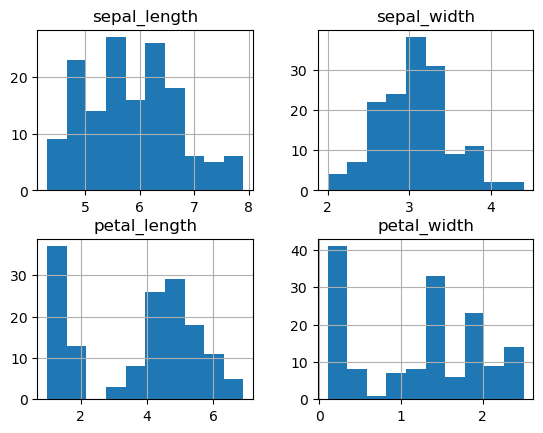

In [57]:
data.hist()
plt.show()

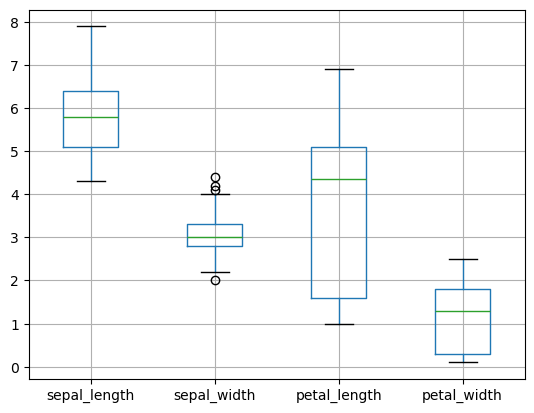

In [59]:
data.boxplot()
plt.show()

<Axes: >

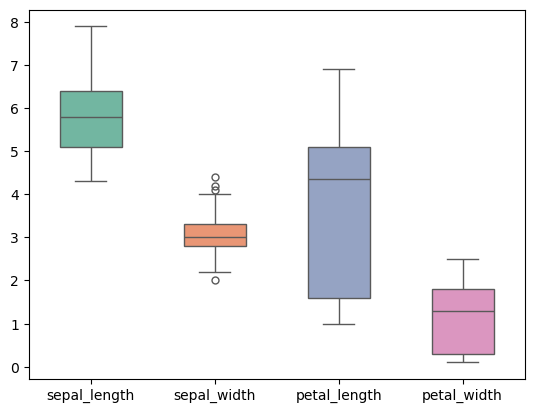

In [103]:
sb.boxplot(data=data, x=None, y=None,  palette="Set2", saturation=0.75, width=0.5, fliersize=5)

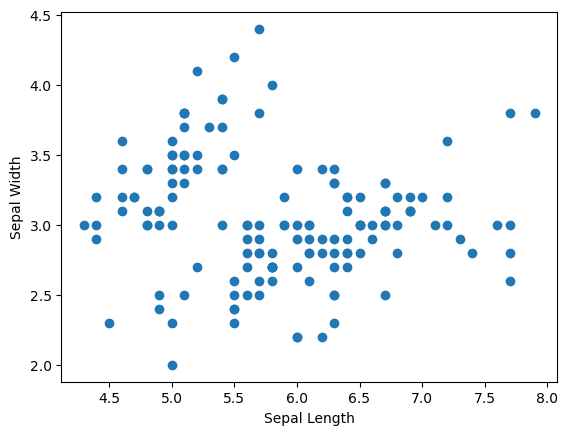

In [93]:
plt.scatter(data["sepal_length"], data["sepal_width"])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Text(0.5, 1.0, 'Distribution of sepal length')

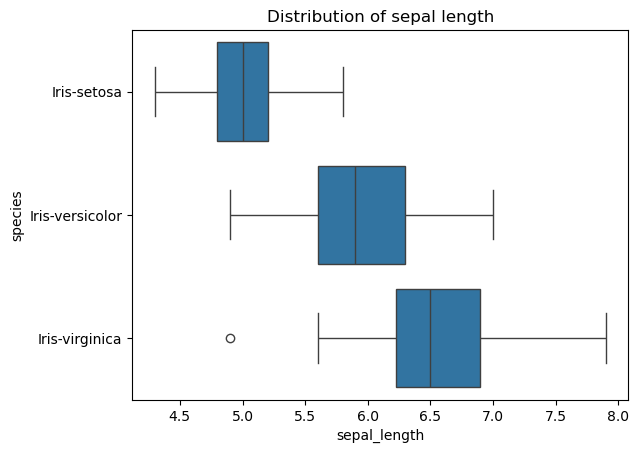

In [41]:
sb.boxplot(data=data, x="sepal_length", y="species")
plt.title('Distribution of sepal length')

In [43]:
Q1 = data.drop(columns=['species']).quantile(0.25)
Q3 = data.drop(columns=['species']).quantile(0.75)
IQR = Q3 - Q1

In [45]:
outliers = ((data.drop(columns=['species']) < (Q1 - 1.5 * IQR)) | (data.drop(columns=['species']) > (Q3 + 1.5 * IQR)))
outlier_counts = outliers.sum()

In [47]:
print(outlier_counts)

sepal_length    0
sepal_width     4
petal_length    0
petal_width     0
dtype: int64


In [49]:
df_cleaned = data[~outliers.any(axis=1)]

In [51]:
print("Dataset before removing outliers:", data.shape)
print("Dataset after removing outliers:", df_cleaned.shape)

Dataset before removing outliers: (150, 5)
Dataset after removing outliers: (146, 5)
